In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import datetime as dt
from atpy import bellhop
from kam11 import ctd, thermister
import matplotlib.pyplot as plt
from collections import OrderedDict


In [2]:
# filesDir = '/Users/edwardlrichards/cir_processing/bellhopFiles/surfaceBounceSensitivity/envA'
filesDir = '/Users/edwardlrichards/cir_processing/bellhopFiles/CTD_TS_bellhop/envA'

In [3]:
allFiles=os.listdir(filesDir)
arrFiles=[]
for file in allFiles:
    fileName, fileExtension = os.path.splitext(file)
    if fileExtension == '.arr':
        arrFiles.append(file)

In [4]:
surfaceBounces=[]
for arr in arrFiles:
    profile = bellhop.readEnv(os.path.join(filesDir, arr))
    arrivals = bellhop.readArr(os.path.join(filesDir, arr))
    oneRunBounces=[]
    for a in arrivals:
        noBounce=np.bitwise_and((a['arrivals']['numTopBounce'] == 0),\
            (a['arrivals']['numBotBounce'] == 0))
        oneSBounce=(a['arrivals']['numTopBounce'] == 1)
        twoSBounce=(a['arrivals']['numTopBounce'] == 2)
        oneB=a['arrivals'].ix[oneSBounce,:]
        twoB=a['arrivals'].ix[twoSBounce,:]
        zeroB=a['arrivals'].ix[noBounce,:]
        rd=a['receiveDepth']
        oneRunBounces.append({'rd':rd,'1SB':oneB,'2SB':twoB,'0B':zeroB})
    sd=a['sourceDepths']
    surfaceBounces.append({'RunName':arr,'sd':sd,'Bounces':oneRunBounces})

In [22]:
def plotSurfaceBounces(surfaceBounces, *args, **kwargs):
    for surf in surfaceBounces:
        rd=surf['rd']
        for ray in surf['1SB'].iterrows():
            if ray[1]['amp'] > 1e-5:
                plt.plot(ray[1]['receiveAngle'], rd, *args, **kwargs)
    plt.xlim(-8,8)
    plt.ylim(100,30)
    plt.xlabel('Arrival declination angle, degrees')
    plt.ylabel('Receiver depth, m')
# surfaceBounces[4]['Bounces'][1]['1SB']

In [12]:
def plotNoBounceBounces(surfaceBounces, *args):
    for surf in surfaceBounces:
        rd=surf['rd']
        for ray in surf['0B'].iterrows():
            if ray[1]['amp'] > 1e-5:
                plt.plot(ray[1]['receiveAngle'], rd, args)
    plt.xlim(-8,8)
    plt.ylim(100,30)
    plt.xlabel('Arrival declination angle, degrees')
    plt.ylabel('Receiver depth, m')
# surfaceBounces[4]['Bounces'][1]['1SB']

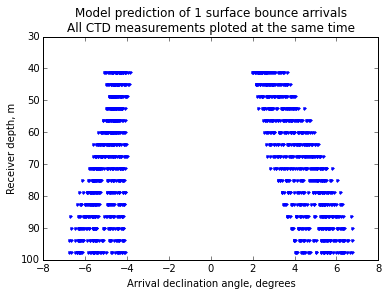

In [7]:
for b in surfaceBounces:
    if b['RunName'] == 'WHOI_TS_J175_1948_A.arr':
        continue
    plotSurfaceBounces(b['Bounces'])
_ = plt.title('Model prediction of 1 surface bounce arrivals'+\
             '\nAll CTD measurements ploted at the same time')

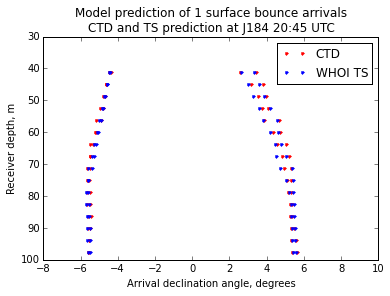

In [39]:
for b in surfaceBounces:
    if (b['RunName'] == 'CTD_J184_2045_A.arr'):
        plotSurfaceBounces(b['Bounces'], 'r.',label='CTD')
    if (b['RunName'] == 'WHOI_TS_J184_2045_A.arr'):
        plotSurfaceBounces(b['Bounces'], 'b.',label='WHOI TS')
        
_ = plt.title('Model prediction of 1 surface bounce arrivals'+\
             '\nCTD and TS prediction at J184 20:45 UTC')
_ = plt.xlim(-8,10)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
_ = plt.legend(by_label.values(), by_label.keys())
_ = plt.savefig('/Users/edwardlrichards/cir_processing/bellhopFiles/CTD_TS_bellhop/figs/J184_2045')

ValueError: third arg must be a format string

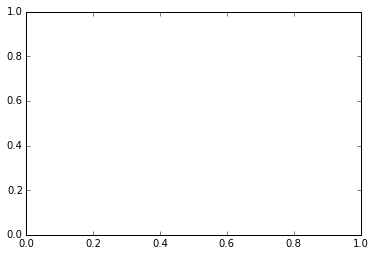

In [36]:
for b in surfaceBounces:
    if b['RunName'] == 'WHOI_TS_J175_1948_A.arr':
        continue
    plotNoBounceBounces(b['Bounces'])
_ = plt.title('Model prediction of 0 bounce arrivals'+\
             '\nAll CTD measurements ploted at the same time')